# TME3 - Descente de gradient

Yona MELLUL - 3800646

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data.mltools import plot_data, plot_frontiere, make_grid, gen_arti

L’objectif de ce TME est d’expérimenter la descente de gradient dans le cadre de la régression linéaire
et de la régression logistique. Dans toute la suite, l’espace d’entrée est de d dimensions, les labels sont
des réels (dans le cas de la régression linéaires) ou dans {−1, 1} (dans le cas de la régression logistique),
l’espace de recherche fonctionnel est considéré paramétré par un vecteur de poids w ∈ R
d
et n dénotera
le nombre d’exemples. Nous ne considérerons pas de biais dans ce TME (pas de poids w0).

#### Attention !
Toutes vos fonctions dans la suite doivent pouvoir prendre en entrée des matrices d’exemples et des
vecteurs de labels - et non pas uniquement un exemple et un label. Nous suivrons les conventions
suivantes : X ∈ R
n,d
, w ∈ R
d,1
, Y ∈ R
n,1
.
Il y a quelques pièges pour la manipulation des matrices avec numpy :
- l’opérateur ∗ permet de multiplier termes à termes deux matrices de même dimension, mais parfois il fait le produit matriciel lorsque les matrices n’ont pas des tailles compatibles (par exemple (1, d) et (d, 1)) !
- l’opérateur ndarray.dot() permet de faire la multiplication matricielle.
- faites le moins possible de boucles (aucune boucle n’est requise dans l’implémentation des fonctions de coût et des gradients !). Python est très lent dans ce cas . . .
- parfois vous passerez une matrice en entrée, parfois un vecteur (lorsque vous ne sélectionnerez qu’une ligne des exemples), or les opérateurs n’auront pas le même comportement selon les cas . . .. Pensez à transformer vos entrées au tout début de toutes vos fonctions afin d’éviter les bugs (par exemple : y = y.reshape(-1,1); w = w.reshape(-1,1); x = x.reshape(y.shape[0],w.shape[0])
- Penser à utiliser np.sign et np.maximum

## Implémentation des fonctions de coût

Implémentez (sans utiliser aucune boucle ! chaque fonction fait 1 à 2 lignes) :
- une fonction mse(w,x,y) qui renvoie le coût aux moindres carrés pour une fonction linéaire de paramètre w sur les données x (de taille n, d) et les labels y. Votre fonction devra sortir le coût sous la forme d’une matrice de taille n, 1 (le coût pour chaque exemple).
- une fonction reglog(w,x,y) qui renvoie le coût de la régression logistique.
- les fonctions mse_grad(w,x,y) et reglog_grad(w,x,y) qui renvoient le gradient des moindres carrés et de la regression logistique sous la forme d’une matrice n, d.

Vous pouvez tester vos fonctions avec la fonction check_fonctions().

In [2]:
def mse(w,x,y):
    """vecteur(d,1) * matrice(n,d) * vecteur(n,1) -> vecteur(n,1)"""
    y = y.reshape(-1,1)
    w = w.reshape(-1,1)
    x = x.reshape(y.shape[0],w.shape[0])
    return ((x@w) - y)**2
    

def mse_grad(w,x,y):
    """vecteur(d,1) * matrice(n,d) * vecteur(n,1) -> matrice(n,d)"""
    y = y.reshape(-1,1)
    w = w.reshape(-1,1)
    x = x.reshape(y.shape[0],w.shape[0])
    return 2*x*((x@w) - y)

def reglog(w,x,y):
    """vecteur(d,1) * matrice(n,d) * vecteur(n,1) -> float"""
    y = y.reshape(-1,1)
    w = w.reshape(-1,1)
    x = x.reshape(y.shape[0],w.shape[0])
    return np.log(1 + np.exp(-y*(x@w)))

def reglog_grad(w,x,y):
    """vecteur(d,1) * matrice(n,d) * vecteur(n,1)"""
    y = y.reshape(-1,1)
    w = w.reshape(-1,1)
    x = x.reshape(y.shape[0],w.shape[0])
    return -x*y / (1 + np.exp(y * (x@w)))

In [3]:
def check_fonctions():
    ## On fixe la seed de l'aléatoire pour vérifier les fonctions
    np.random.seed(0)
    datax, datay = gen_arti(epsilon=0.1)
    wrandom = np.random.randn(datax.shape[1],1)
    assert(np.isclose(mse(wrandom,datax,datay).mean(),0.54731,rtol=1e-4))
    assert(np.isclose(reglog(wrandom,datax,datay).mean(), 0.57053,rtol=1e-4))
    assert(np.isclose(mse_grad(wrandom,datax,datay).mean(),-1.43120,rtol=1e-4))
    assert(np.isclose(reglog_grad(wrandom,datax,datay).mean(),-0.42714,rtol=1e-4))
    np.random.seed()
check_fonctions()

## Descente de gradient

Implémentez une fonction descente_gradient(datax,datay,f_loss,f_grad,eps,iter) qui réalise
une descent de gradient pour optimier le coût f_loss (dont le gradient est donné par f_grad) sur les
données datax et les labels datay, avec un pas de descente de eps et iter itérations. Votre fonction
devra renvoyer le paramètre optimal w trouvé, la liste des w et les valeurs de la fonction de coût au fur
et à mesure des itérations.

In [4]:
def descente_gradient(datax,datay,f_loss,f_grad,eps,iter=1000):
    """
    matrice * vecteur * fonction * fonction * float * int -> vecteur
    """
    n = datax.shape[0]
    w = np.random.randn(datax.shape[1],1)
    w_list = []
    err_list = []

    for i in range(iter):
        w = w - eps * f_grad(w,datax,datay).mean(axis=0).reshape(-1,1)
        w_list.append(w)
        err_list.append(f_loss(w,datax,datay).mean())
        

    return w,np.array(w_list),np.array(err_list)


In [5]:
#descente_gradient(datax, datay, mse, mse_grad, 1e-4)

## Expérimentations

Vous trouverez dans le fichier mltools.py une fonction gen_arti(nbex=1000,data_type=0,epsilon=0.02)
qui permet de générer des jeux de données de nbex points selon : 2 gaussiennes (data_type=0), 4 gaussiennes (data_type=1) et un échiquier (data_type=2) avec un bruit epsilon. Vous avez également les
fonctions :
- plot_data(data,labels) qui permet de visualiser les données ;
- plot_frontiere(data,f,step) qui permet de tracer les frontières de décision de la fonction f pour un problème 2D en discrétisant l’espace en step intervalles ;
- make_grid(data,xmin,xmax,ymin,ymax,step) qui permet de construire une grille de discrétisation d’un espace 2D (en considérant comme bornes de l’espace soit les minimums et maximums de data, soit les valeurs passées en paramètre).

Des exemples d’utilisation sont données dans le squelette du code du TME.
Testez votre implémentation de la descente du gradient sur le problème à deux gaussiennes. Comparez
les résultats obtenus entre la régression linéaire et la régression logistique. Visualisez les frontières de
décision et tracez l’évolution du coût en fonction des itérations. Que se passe-t-il lorsque le pas de
gradient est augmenté ou diminué fortement ? Dans le cas d’un problème séparable et dans le cas d’un
problème non séparable (par exemple en augmentant le bruit fortement).
Visualisez la fonction de coût dans l’espace des poids selon les deux dimensions du problème (cf squelette
du code du TME). Tracez sur le même graphique la trajectoire suivie par l’algorithme d’optimisation
(les w au fur et à mesure des itérations).
Expérimentez sur les autres types de données artificielles

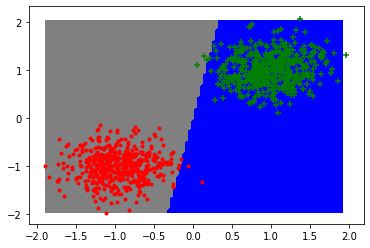

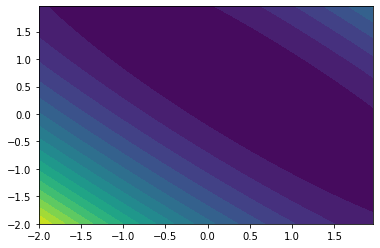

In [6]:
## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
datax, datay = gen_arti(epsilon=0.1)
## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w  = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)


### Régression linéaire sur données séparables

erreur =  0.12822047017510396


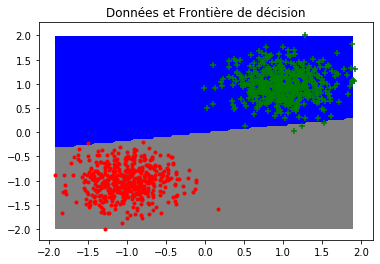

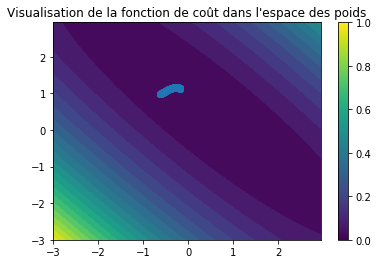

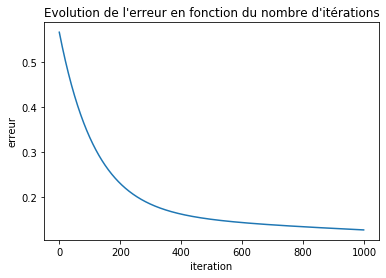

In [7]:
save = False
## Tirage d'un jeu de données aléatoire (mélange de 2 gaussiennes) avec un petit bruit
datax, datay = gen_arti(epsilon=0.05)

## Apprentissage
eps=1e-3
iter = 1000
wopt,w_list,err_list = descente_gradient(datax,datay,mse,mse_grad,eps,iter)
print("erreur = ",err_list[-1])

## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w = wopt
plt.figure()
plt.title("Données et Frontière de décision")
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

if save:
    plt.savefig("fig/lin/sep_data")

## Visualisation de la fonction de coût en 2D
## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
lim = np.ceil(np.max(np.abs(w_list))+1)
grid, x_grid, y_grid = make_grid(xmin=-lim, xmax=lim, ymin=-lim, ymax=lim, step=100)
plt.figure()
plt.title("Visualisation de la fonction de coût dans l'espace des poids")
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)
plt.scatter(w_list[:,0],w_list[:,1])
plt.colorbar()

if save:
    plt.savefig("fig/lin/sep_loss")

## Evolution de l'erreur
plt.figure()
plt.plot(err_list)
plt.title("Evolution de l'erreur en fonction du nombre d'itérations")
plt.xlabel("iteration")
plt.ylabel("erreur")

if save:
    plt.savefig("fig/lin/sep_err")

plt.show()


### Régression linéaire sur données non séparables

erreur =  0.30265345049293796


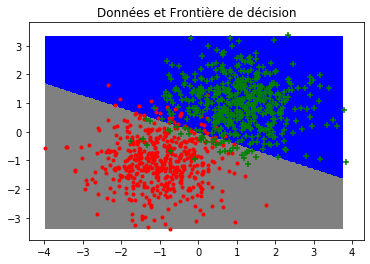

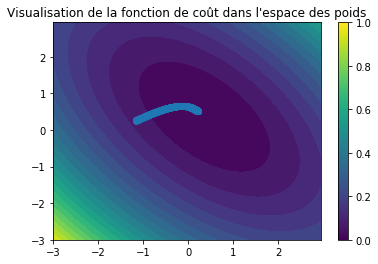

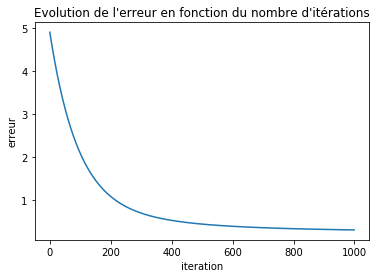

In [8]:
## Tirage d'un jeu de données aléatoire (mélange de 2 gaussiennes) avec un grand bruit
datax, datay = gen_arti(epsilon=0.8)

## Apprentissage
eps=1e-3
iter = 1000
wopt,w_list,err_list = descente_gradient(datax,datay,mse,mse_grad,eps,iter)
print("erreur = ",err_list[-1])

## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w = wopt
plt.figure()
plt.title("Données et Frontière de décision")
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

if save:
    plt.savefig("fig/lin/nsep_data")

## Visualisation de la fonction de coût en 2D
## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
lim = np.ceil(np.max(np.abs(w_list))+1)
grid, x_grid, y_grid = make_grid(xmin=-lim, xmax=lim, ymin=-lim, ymax=lim, step=100)
plt.figure()
plt.title("Visualisation de la fonction de coût dans l'espace des poids")
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)
plt.scatter(w_list[:,0],w_list[:,1])
plt.colorbar()

if save:
    plt.savefig("fig/lin/nsep_loss")

## Evolution de l'erreur
plt.figure()
plt.plot(err_list)
plt.title("Evolution de l'erreur en fonction du nombre d'itérations")
plt.xlabel("iteration")
plt.ylabel("erreur")

if save:
    plt.savefig("fig/lin/nsep_err")

plt.show()

Nous pouvons voir que dans les 2 cas: plus on fait d'itérations, plus l'erreur diminue.

Aussi, et logiquement, on fait plus d'erreurs avec des données non séparables (erreur = 0.40) qu'avec des données séparables (erreur = 0.06).

### Régressions logistique sur données séparables

erreur =  0.06544619131254421


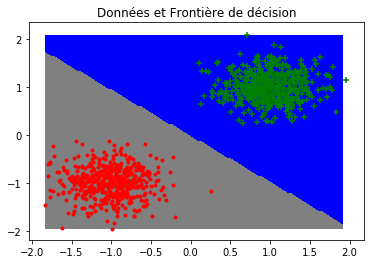

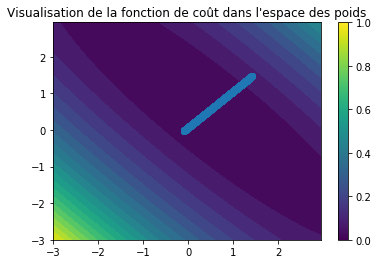

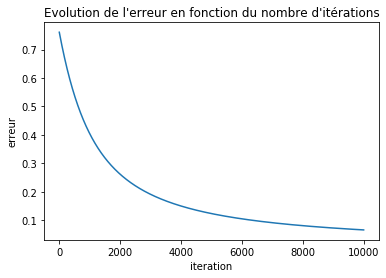

In [9]:
## Tirage d'un jeu de données aléatoire (mélange de 2 gaussiennes) avec un petit bruit
datax, datay = gen_arti(epsilon=0.05)

## Apprentissage
eps=1e-3
iter = 10000
wopt,w_list,err_list = descente_gradient(datax,datay,reglog,reglog_grad,eps,iter)
print("erreur = ",err_list[-1])

## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w = wopt
plt.figure()
plt.title("Données et Frontière de décision")
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

if save:
    plt.savefig("fig/log/sep_data")

## Visualisation de la fonction de coût en 2D
## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
lim = np.ceil(np.max(np.abs(w_list))+1)
grid, x_grid, y_grid = make_grid(xmin=-lim, xmax=lim, ymin=-lim, ymax=lim, step=100)
plt.figure()
plt.title("Visualisation de la fonction de coût dans l'espace des poids")
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)
plt.scatter(w_list[:,0],w_list[:,1])
plt.colorbar()

if save:
    plt.savefig("fig/log/sep_loss")

## Evolution de l'erreur
plt.figure()
plt.plot(err_list)
plt.title("Evolution de l'erreur en fonction du nombre d'itérations")
plt.xlabel("iteration")
plt.ylabel("erreur")

if save:
    plt.savefig("fig/log/sep_err")

plt.show()


### Régression logistique sur données non séparables

erreur =  0.17603816764822663


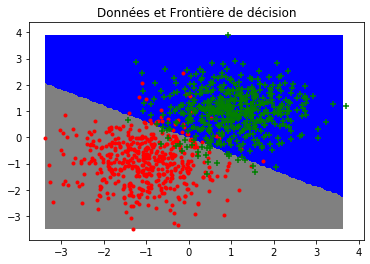

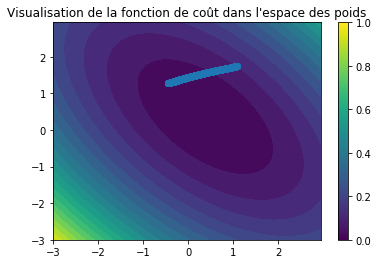

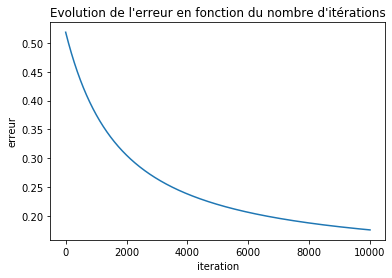

In [10]:
## Tirage d'un jeu de données aléatoire (mélange de 2 gaussiennes) avec un grand bruit
datax, datay = gen_arti(epsilon=0.8)

## Apprentissage
eps=1e-3
iter = 10000
wopt,w_list,err_list = descente_gradient(datax,datay,reglog,reglog_grad,eps,iter)
print("erreur = ",err_list[-1])

## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w = wopt
plt.figure()
plt.title("Données et Frontière de décision")
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)

if save:
    plt.savefig("fig/log/nsep_data")

## Visualisation de la fonction de coût en 2D
## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
lim = np.ceil(np.max(np.abs(w_list))+1)
grid, x_grid, y_grid = make_grid(xmin=-lim, xmax=lim, ymin=-lim, ymax=lim, step=100)
plt.figure()
plt.title("Visualisation de la fonction de coût dans l'espace des poids")
plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)
plt.scatter(w_list[:,0],w_list[:,1])
plt.colorbar()

if save:
    plt.savefig("fig/log/nsep_loss")

## Evolution de l'erreur
plt.figure()
plt.plot(err_list)
plt.title("Evolution de l'erreur en fonction du nombre d'itérations")
plt.xlabel("iteration")
plt.ylabel("erreur")

if save:
    plt.savefig("fig/log/nsep_err")

plt.show()

Nous pouvons voir que dans les 2 cas: plus on fait d'itérations, plus l'erreur diminue.

Aussi, et logiquement, on fait plus d'erreurs avec des données non séparables (erreur = 0.17) qu'avec des données séparables (erreur = 0.07).

Nous remarquons cependant que la regression logistique converge beaucoup moins vite que la régression linéaire. 